<a href="https://colab.research.google.com/github/srishtipithadia/ProjectsInMLandAI/blob/main/HW5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**Homework 5: CNNs, AEs & GANs**

*   By: Srishti Pithadia
*   Date: November 4th, 2022


---


**Task 1: Implement a CNN**

In [55]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import random
import os

from google.colab import drive
from PIL import Image
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras_preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from statistics import mean

a. Downloading the Dataset

In [ ]:
# link: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/code

# uploaded dataset to my Google Drive
drive.mount('/content/drive')

# retreived dataset from Google Drive
dir = os.listdir('../content/drive/MyDrive/chest_xray')
print(dir)

Mounted at /content/drive
['val', 'train', 'test']


b. Preparing the Dataset

In [5]:
# viewing training data
train_folder = os.listdir('../content/drive/MyDrive/chest_xray/train/')
print(train_folder)

train_n = os.listdir('../content/drive/MyDrive/chest_xray/train/NORMAL/')
train_p = os.listdir('../content/drive/MyDrive/chest_xray/train/PNEUMONIA/')

print('Length of N Set:  {}'.format(len(train_n)))
print('Length of P Set:  {}'.format(len(train_p)))

['PNEUMONIA', 'NORMAL', '.DS_Store']
Length of N Set:  1342
Length of P Set:  3876


In [6]:
# viewing testing data
test_folder = os.listdir('../content/drive/MyDrive/chest_xray/test/')
print(test_folder)

test_n = os.listdir('../content/drive/MyDrive/chest_xray/test/NORMAL/')
test_p = os.listdir('../content/drive/MyDrive/chest_xray/test/PNEUMONIA/')

print('Length of N Set:  {}'.format(len(test_n)))
print('Length of P Set:  {}'.format(len(test_p)))

['NORMAL', 'PNEUMONIA', '.DS_Store']
Length of N Set:  234
Length of P Set:  390


In [7]:
# viewing validation data
val_folder = os.listdir('../content/drive/MyDrive/chest_xray/val/')
print(val_folder)

val_n = os.listdir('../content/drive/MyDrive/chest_xray/val/NORMAL/')
val_p = os.listdir('../content/drive/MyDrive/chest_xray/val/PNEUMONIA/')

print('Length of N Set:  {}'.format(len(val_n)))
print('Length of P Set:  {}'.format(len(val_p)))

['PNEUMONIA', 'NORMAL', '.DS_Store']
Length of N Set:  9
Length of P Set:  9


In [56]:
# normalizing the images
train_idg = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_val_idg = ImageDataGenerator(rescale=1./255)

# getting the final adjusted datasets for the CNN
train = train_idg.flow_from_directory('../content/drive/MyDrive/chest_xray/train', target_size = (64, 64), batch_size = 32, class_mode = 'binary')
test = test_val_idg.flow_from_directory('../content/drive/MyDrive/chest_xray/test', target_size = (64, 64), batch_size = 32, class_mode = 'binary')
val = test_val_idg.flow_from_directory('../content/drive/MyDrive/chest_xray/val', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


c. Visualizing the Dataset

Text(0.5, 1.0, 'Pneumonia')

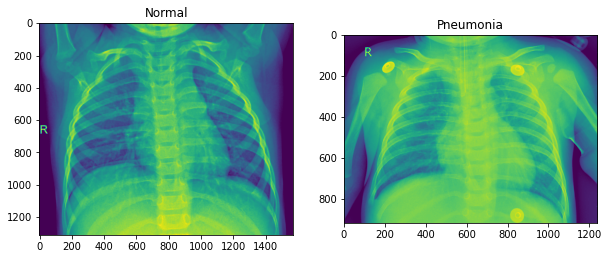

In [9]:
# visualizing random training images

# get random index for each subset in training data
n_int1 = np.random.randint(0, len(train_n))
p_int1 = np.random.randint(0, len(train_p))

# load up image at specified index for each subset
n_pic1 = Image.open('../content/drive/MyDrive/chest_xray/train/NORMAL/{}'.format(train_n[n_int1]))
p_pic1 = Image.open('../content/drive/MyDrive/chest_xray/train/PNEUMONIA/{}'.format(train_p[p_int1]))

# plot images
f = plt.figure(figsize= (10,6))

# normal image being plotted
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(n_pic1)
a1.set_title('Normal')

# pneumonia image being loaded
a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(p_pic1)
a2.set_title('Pneumonia')

Text(0.5, 1.0, 'Pneumonia')

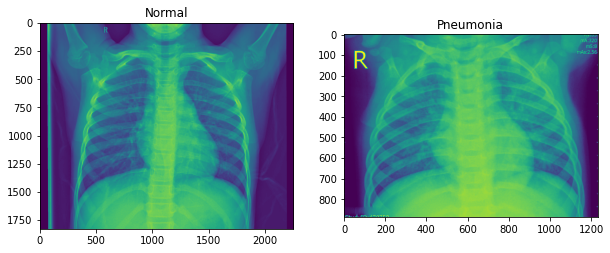

In [10]:
# visualizing random testing images

# get random index for each subset in testing data
n_int2 = np.random.randint(0, len(test_n))
p_int2 = np.random.randint(0, len(test_p))

# load up image at specified index for each subset
n_pic2 = Image.open('../content/drive/MyDrive/chest_xray/test/NORMAL/{}'.format(test_n[n_int2]))
p_pic2 = Image.open('../content/drive/MyDrive/chest_xray/test/PNEUMONIA/{}'.format(test_p[p_int2]))

# plot images
f = plt.figure(figsize= (10,6))

# normal image being plotted
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(n_pic2)
a1.set_title('Normal')

# pneumonia image being loaded
a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(p_pic2)
a2.set_title('Pneumonia')

Text(0.5, 1.0, 'Pneumonia')

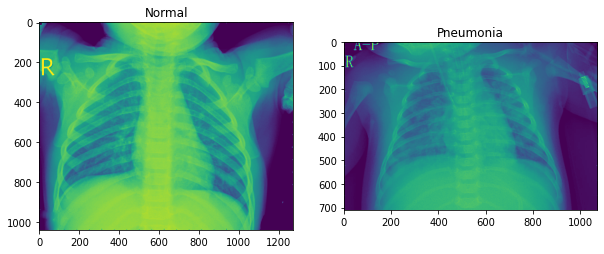

In [11]:
# visualizing random validation images

# get random index for each subset in validation data
n_int3 = np.random.randint(0, len(val_n))
p_int3 = np.random.randint(0, len(val_p))

# load up image at specified index for each subset
n_pic3 = Image.open('../content/drive/MyDrive/chest_xray/val/NORMAL/{}'.format(val_n[n_int3]))
p_pic3 = Image.open('../content/drive/MyDrive/chest_xray/val/PNEUMONIA/{}'.format(val_p[p_int3]))

# plot images
f = plt.figure(figsize= (10,6))

# normal image being plotted
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(n_pic3)
a1.set_title('Normal')

# pneumonia image being loaded
a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(p_pic3)
a2.set_title('Pneumonia')

There doesn't seem to be a very obvious difference in the images with pneumonia vs. without, so it will be interesting to see how the model performs. I hypothesize that the accuracy won't be as high as it was for previous homeworks as a result though.

d. Creating the CNN

In [57]:
# Implementation of CNN

def make_cnn():
    # initializing CNN
    model = Sequential()

    # first convolution & pooling layer
    model.add(Conv2D(32, (3, 3), activation="relu", input_shape = (64, 64, 3)))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # second convolution & pooling layer
    model.add(Conv2D(32, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # flatten
    model.add(Flatten())

    # fully connected layers
    model.add(Dense(activation = 'relu', units = 128))
    model.add(Dense(activation = 'sigmoid', units = 1))

    # compile
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

I chose the pattern of 2 convolutional/pooling layers because it's generally between 2-4 on average. I stopped at 2 because I read that the improvements in accuracy are very small after 2 or 3. 

In [58]:
# making model and getting summary
cnn_model = make_cnn()
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [ ]:
# defining callbacks to avoid overfitting
callbacks = [EarlyStopping(monitor = 'val_accuracy', mode = 'max', baseline = .85), 
             ReduceLROnPlateau(monitor = 'val_accuracy', verbose = 0, patience = 2, factor = 0.5, min_lr = 0.00001)]

# fitting CNN model
history = cnn_model.fit(train, steps_per_epoch = len(train)/2, epochs = 5, validation_data = val, validation_steps = len(val), callbacks = callbacks)

Epoch 1/5
81/81 [==============================] - 34s 403ms/step - loss: 0.3791 - accuracy: 0.8327 - val_loss: 0.3710 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 2/5
81/81 [==============================] - 31s 385ms/step - loss: 0.2472 - accuracy: 0.8952 - val_loss: 0.3641 - val_accuracy: 0.8750 - lr: 0.0010


e. Evaluating the CNN

In [59]:
# making methods for evaluation 


# makes loss graph
def make_loss_graph(history):
  plt.plot(history.history['loss'], label = 'Training loss')
  plt.plot(history.history['val_loss'], label = 'Validation loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend()

  # mean values for loss
  print('\nAvg Train Loss:  {}'.format(mean(history.history['loss']))) 
  print('Avg Val Loss:    {}\n'.format(mean(history.history['val_loss']))) 



# makes accuracy graph
def make_accuracy_graph(history):
  plt.plot(history.history['accuracy'], label = 'Training acc')
  plt.plot(history.history['val_accuracy'], label = 'Validation acc')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend()

  # mean values for accuracy
  print('\nAvg Train Accuracy:  {}'.format(mean(history.history['accuracy']) * 100)) 
  print('Avg Val Accuracy:    {}\n'.format(mean(history.history['val_accuracy']) * 100)) 



# makes prediction 
def predict_status(img_name, model):
  i = img_to_array(load_img('../content/drive/MyDrive/chest_xray/test/{}'.format(img_name), target_size = (64, 64)))
  i = np.expand_dims(i, axis = 0)

  result = model.predict(i)

  if result[0][0] == 0:
    return 'Negative (normal)'
  else:
    return 'Positive (pneumonia)'


Avg Train Loss:  0.3131471872329712
Avg Val Loss:    0.3675433397293091



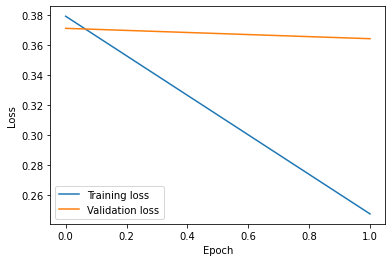

In [ ]:
# evaluating model with loss graph
make_loss_graph(history)


Avg Train Accuracy:  86.39481663703918
Avg Val Accuracy:    90.625



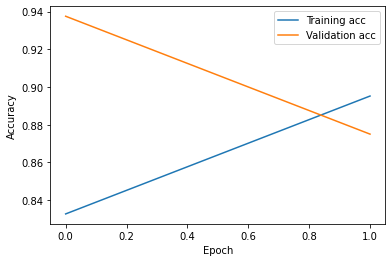

In [ ]:
# evaluating model with accuracy graph
make_accuracy_graph(history)

When I originally used "fit" without the callbacks, my model was significantly overfitting. The average training accuracy was ~95%, but the average validation accuracy was around ~70%. That's a ~25% difference, making it pretty clear my model was overfitting. Alternatively, when the callbacks were used, the average training accuracy was 86.39% (a drop of ~9%) and the average validation accuracy was 90.62% (an improvement of ~20%). This is only a ~4% difference, making it evident that using the callbacks really improved my model, despite the training accuracy decreasing.

In [ ]:
# getting accuracy for test set
print('\nTest Accuracy:       {}'.format(cnn_model.evaluate(test, steps = len(test))[1]*100))

20/20 [==============================] - 91s 5s/step - loss: 0.2698 - accuracy: 0.8878

Test Accuracy:       88.78205418586731


When comparing the average training accuracy (86.39%), the average validation accuracy (90.62%), and the testing accuracy (88.78%), it's clear that there isn't a discrepancy. All of the accuracy values are within ~4% of each other, meaning that the model is performing fairly consistently. This is a really good thing, and for the most part, the model is pretty accurate too (as only ~15% of the predictions didn't match).

In [64]:
# predict with normal input
predict_status('NORMAL/NORMAL2-IM-0339-0001.jpeg', cnn_model)

1/1 [==============================] - 0s 24ms/step


'Negative (normal)'

In [62]:
# predict with pneumonia input
predict_status('PNEUMONIA/person109_bacteria_513.jpeg', cnn_model)

1/1 [==============================] - 0s 30ms/step


'Positive (pneumonia)'

Finally, for the predictions, we got the desired values. Both were correct, indicating that the model is well-fitted.

f. Comparing with VGG

In [36]:
# Implementation of VGG16

def make_vgg():
  # initializing VGG16
  model = VGG16(
      include_top = False,
      input_shape = (64, 64, 3),
      weights = "imagenet"
  )

  # modifying trainability (16 layer min)
  for layer in model.layers[:15]:
      layer.trainable = False

  for layer in model.layers[15:]:
      layer.trainable = True
      
  # flatten & add classification layer
  out = Flatten()(model.get_layer('block5_pool').output)
  out = Dropout(0.5)(out)
  out = Dense(1, activation='sigmoid')(out)

  # make above adjustments to model
  model = keras.Model(model.input, out)

  # compile
  model.compile(loss='binary_crossentropy', optimizer = keras.optimizers.SGD(lr=1e-4, momentum=0.9), metrics=['accuracy'])

  return model

In [37]:
# making model and getting summary
vgg_model = make_vgg()
vgg_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [38]:
# normalizing the images
vtrain_idg = ImageDataGenerator(preprocessing_function = preprocess_input)
vtest_val_idg = ImageDataGenerator(preprocessing_function = preprocess_input)

# getting the final adjusted datasets for the CNN
vtrain = vtrain_idg.flow_from_directory('../content/drive/MyDrive/chest_xray/train', target_size = (64, 64), batch_size = 32, class_mode = 'binary')
vtest = vtest_val_idg.flow_from_directory('../content/drive/MyDrive/chest_xray/test', target_size = (64, 64), batch_size = 32, class_mode = 'binary')
vval = vtest_val_idg.flow_from_directory('../content/drive/MyDrive/chest_xray/val', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [42]:
# defining callbacks to avoid overfitting
vcallbacks = [EarlyStopping(monitor = 'val_accuracy', mode = 'max', baseline = .92), 
             ReduceLROnPlateau(monitor = 'val_accuracy', verbose = 0, patience = 2, factor = 0.5, min_lr = 0.00001)]

# fitting VGG16 model
vgg_history = vgg_model.fit(vtrain, steps_per_epoch = len(vtrain)/8, epochs = 5, validation_data = vval, validation_steps = len(vval), callbacks = vcallbacks)

Epoch 1/5
20/20 [==============================] - 54s 3s/step - loss: 0.1854 - accuracy: 0.9271 - val_loss: 0.2045 - val_accuracy: 0.9375 - lr: 1.0000e-04
Epoch 2/5
20/20 [==============================] - 56s 3s/step - loss: 0.1536 - accuracy: 0.9345 - val_loss: 0.1686 - val_accuracy: 0.9375 - lr: 1.0000e-04



Avg Train Loss:  0.16951057314872742
Avg Val Loss:    0.18656058609485626



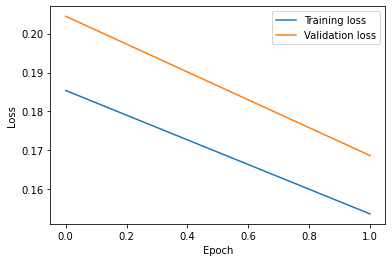

In [43]:
# evaluating model with loss graph
make_loss_graph(vgg_history)


Avg Train Accuracy:  93.08035671710968
Avg Val Accuracy:    93.75



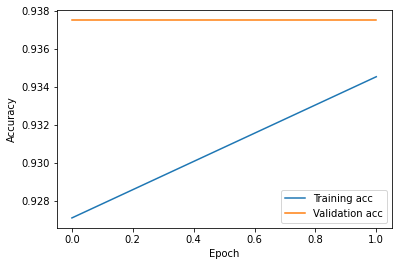

In [44]:
# evaluating model with accuracy graph
make_accuracy_graph(vgg_history)

For the CNN the average training accuracy was 86.39% and the average validation accuracy was 90.62%. In comparison, when using the VGG16 model, the average training accuracy was 93.08% and the average validation accuracy was 93.75%. This demonstrates an increase in average training accuracy by ~7% and an increase in average validation accuracy by ~3%. Additionally, it's notable that the difference between the averages for training and validation is a lot smaller with the VGG16. With the CNN, there was a ~4% difference between the average training and validation accuracies. However, with the VGG16, the difference between both is only ~0.7%. This is a considerable improvement. Additionally, the loss is only decreasing between each epoch, and the accuracies are only increasing/being maintained. The fact that loss never increases and accuracy never decreases makes the VGG16 model seem more reliable.

In [48]:
# getting accuracy for test set
print('\nTest Accuracy:       {}'.format(vgg_model.evaluate(vtest, steps = len(vtest))[1]*100))

20/20 [==============================] - 42s 2s/step - loss: 0.5616 - accuracy: 0.8494

Test Accuracy:       84.93589758872986


When comparing the average training accuracy (93.08%), the average validation accuracy (93.75%), and the testing accuracy (84.94%), it appears that there is a bit of a discrepancy. For the CNN, all of the accuracy values were within ~4% of each other, meaning that it was performing fairly consistently. However, here, all of the values span a range of ~8%. This is a decrease from the CNN, not to mention that the testing accuracy itself decreased between the CNN and the VGG16 (from ~88% to ~85%). Luckily, it's not a very large difference, but it is still disappointing that it decreased. It gives me come doubt in regards to the VGG16 model's consistency. 

In [80]:
# predict with normal input
predict_status('NORMAL/NORMAL2-IM-0030-0001.jpeg', vgg_model)

1/1 [==============================] - 0s 118ms/step


'Positive (pneumonia)'

In [73]:
# predict with pneumonia input
predict_status('PNEUMONIA/person109_bacteria_513.jpeg', vgg_model)

1/1 [==============================] - 0s 126ms/step


'Positive (pneumonia)'

Finally, for the predictions, we did not get the desired values. Only the pneumonia image was predicted correctly, but the normal one wasn't. This conflicts with the results from the average training and validation accuracies. It may have been in the 15% that the model missed with the test set though (since the test accuracy was only ~85%). I think the average training and validation accuracies indicate that the model is more accurate than the CNN, but I think that's because of the 16 layers (since the more layers there are, the higher the chance of getting a higher accuracy). The testing accuracy conflicts with that conclusion though, so I'm not really sure why that could have happened. Maybe this is a situation where I'd need to look into fine-tuning? But I'm not entirely sure.

g. Augmenting the Dataset

In [108]:
# Implementation of CNN with augmented images

def make_cnn_augmented():
    # initializing CNN
    model = Sequential([
        # augmenting the images
        keras.layers.RandomFlip("horizontal_and_vertical"),
        keras.layers.RandomRotation(0.2),

        # first convolution & pooling layer
        Conv2D(32, (3, 3), activation="relu", input_shape = (64, 64, 3)),
        MaxPooling2D(pool_size = (2, 2)),

        # second convolution & pooling layer
        Conv2D(32, (3, 3), activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),

        # flatten
        Flatten(),

        # fully connected layers
        Dense(activation = 'relu', units = 128),
        Dense(activation = 'sigmoid', units = 1)
    ])

    # compile 
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

In [109]:
# making model
aug_model = make_cnn_augmented()

# build in correct shape & summarize
aug_model.build((64, 64, 64, 3))
aug_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_12 (RandomFlip)  (64, 64, 64, 3)          0         
                                                                 
 random_rotation_12 (RandomR  (64, 64, 64, 3)          0         
 otation)                                                        
                                                                 
 conv2d_26 (Conv2D)          (64, 62, 62, 32)          896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (64, 31, 31, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (64, 29, 29, 32)          9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (64, 14, 14, 32)       

In [105]:
# normalizing the images
atrain_idg = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
atest_val_idg = ImageDataGenerator(rescale=1./255)

# getting the final adjusted datasets for the CNN
atrain = train_idg.flow_from_directory('../content/drive/MyDrive/chest_xray/train', target_size = (64, 64), batch_size = 32, class_mode = 'binary')
atest = test_val_idg.flow_from_directory('../content/drive/MyDrive/chest_xray/test', target_size = (64, 64), batch_size = 32, class_mode = 'binary')
aval = test_val_idg.flow_from_directory('../content/drive/MyDrive/chest_xray/val', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [111]:
# defining callbacks to avoid overfitting
callbacks = [EarlyStopping(monitor = 'val_accuracy', mode = 'max', baseline = .85), 
             ReduceLROnPlateau(monitor = 'val_accuracy', verbose = 0, patience = 2, factor = 0.5, min_lr = 0.00001)]

# fitting CNN model
aug_history = aug_model.fit(atrain, steps_per_epoch = len(atrain)/2, epochs = 5, validation_data = aval, validation_steps = len(aval))

Epoch 1/5
81/81 [==============================] - 67s 823ms/step - loss: 0.3083 - accuracy: 0.8662 - val_loss: 0.8135 - val_accuracy: 0.6250
Epoch 2/5
81/81 [==============================] - 53s 649ms/step - loss: 0.2857 - accuracy: 0.8826 - val_loss: 0.6103 - val_accuracy: 0.6875
Epoch 3/5
81/81 [==============================] - 57s 702ms/step - loss: 0.2692 - accuracy: 0.8853 - val_loss: 0.5595 - val_accuracy: 0.6875
Epoch 4/5
81/81 [==============================] - 52s 633ms/step - loss: 0.2973 - accuracy: 0.8761 - val_loss: 0.5530 - val_accuracy: 0.8750
Epoch 5/5
81/81 [==============================] - 53s 648ms/step - loss: 0.2677 - accuracy: 0.8838 - val_loss: 0.5646 - val_accuracy: 0.8750



Avg Train Loss:  0.2856110751628876
Avg Val Loss:    0.6201728105545044



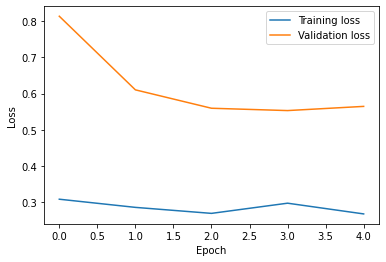

In [112]:
# evaluating model with loss graph
make_loss_graph(aug_history)


Avg Train Accuracy:  87.8810966014862
Avg Val Accuracy:    75.0



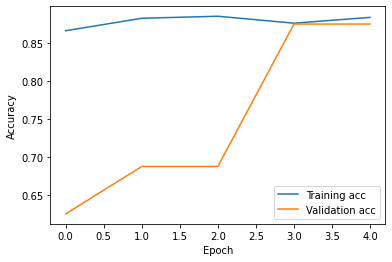

In [113]:
# evaluating model with accuracy graph
make_accuracy_graph(aug_history)

Without augmenting images, the average training accuracy was 86.39% and the average validation accuracy was 90.62%. In comparison, when images were augmented, the average training accuracy was 87.88% and the average validation accuracy was 75%. This demonstrates an increase in average training accuracy by ~1% and a decrease in average validation accuracy by ~15%. It's also notable that the difference between the averages for training and validation is a lot smaller when not augmented. When the images are augmented, there is a ~13% difference between the average training and validation accuracies (in comparison to the ~4% when not augmented). However, it does seem good that the loss is only decreasing between each epoch, and the accuracies are only increasing for the most part. The fact that loss never increases and accuracy doesn't usually decrease leads me to believe that although it is a bit more difficult for the model, it is nearly as reliable.

In [114]:
# getting accuracy for test set
print('\nTest Accuracy:       {}'.format(aug_model.evaluate(atest, steps = len(atest))[1]*100))

20/20 [==============================] - 10s 511ms/step - loss: 0.3442 - accuracy: 0.8397

Test Accuracy:       83.97436141967773


When comparing the average training accuracy (87.88%), the average validation accuracy (75%), and the testing accuracy (83.97%), there doesn't seem to be any discrepancies. For the nonaugmented images, all of the accuracy values were within ~4% of each other, meaning that it was performing fairly consistently. Alternatively, when the images were augmented, all of the values span a range of ~12%. This range is only because validation, so at least the testing accuracy doesn't increase this range. Because of this, I believe the model is still fairly consistent (even if not as much as when the images aren't augmented). 

In [119]:
# predict with normal input
predict_status('NORMAL/NORMAL2-IM-0352-0001.jpeg', aug_model)

1/1 [==============================] - 0s 177ms/step


'Negative (normal)'

In [120]:
# predict with pneumonia input
predict_status('PNEUMONIA/person109_bacteria_513.jpeg', aug_model)

1/1 [==============================] - 0s 31ms/step


'Positive (pneumonia)'

Finally, for the predictions, we got the desired values. Both were correct, indicating that the model is well-fitted. There does not appear to be a significant difference in results when the images are augmented. 